In [1]:
!pip install matplotlib  #최초 한번만 설치:Anaconda에 설치됨

ERROR: Invalid requirement: '#최초'


In [2]:
!pip install wordcloud  #최초 한번만 설치:Anaconda에 설치됨

ERROR: Invalid requirement: '#최초'


In [5]:
import pandas as pd
import glob #glob 모듈의 glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환한다.
import re # 정규표현식 사용을 위해 임포트
from functools import reduce #여러 개의 데이터를 대상으로 주로 누적 집계를 내기 위해서 사용합니다.

from nltk.tokenize import word_tokenize  #nltk는 자연어 처리 패키지
from nltk.corpus import stopwords # I, my, me, over, 조사, 접미사 같은 단어들은 문장에서는 자주 등장하지만 실제 의미 분석을 하는데는 거의 기여하는 바가 없는 경우가 있습니다. 
#이러한 단어들을 불용어(stopword)라고 하며, NLTK에서는 위와 같은 100여개 이상의 영어 단어들을 불용어로 패키지 내에서 미리 정의하고 있습니다.
from nltk.stem import WordNetLemmatizer #표제어 추출위한 임포트

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
import nltk     # nltk.download() 를 하기위해, import 함.

In [3]:
nltk.download()  # 최초 한번만 설치: download 창이 뜨면, 모두 선택하고 [Download] 버튼 클릭!

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
all_files = glob.glob(r'분석자료\myCabinetExcelData*.xls') # 유용하게 사용 가능

all_files #출력하여 내용 확인

['분석자료\\myCabinetExcelData (1).xls',
 '분석자료\\myCabinetExcelData (2).xls',
 '분석자료\\myCabinetExcelData (3).xls',
 '분석자료\\myCabinetExcelData (4).xls',
 '분석자료\\myCabinetExcelData (5).xls',
 '분석자료\\myCabinetExcelData (6).xls',
 '분석자료\\myCabinetExcelData (7).xls',
 '분석자료\\myCabinetExcelData (8).xls',
 '분석자료\\myCabinetExcelData (9).xls',
 '분석자료\\myCabinetExcelData.xls']

In [9]:
all_files_data = [] #저장할 리스트 

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[5] #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,"Data, Big Data, and Metadata in Anesthesiology","Levin, Matthew A.; Wanderer, Jonathan P.; Eh...","Lippincott, Williams & Wilkins",2015
1,NaN,2,Big Data in medical research and EU data prote...,"Mostert, M.; Bredenoord, A. L.; Biesaart, M. C...",Nature Publishing Group,2016
2,NaN,3,Data Processing Model to Perform Big Data Anal...,"Dos Anjos, Julio C. S.; Matteussi, Kassiano J....",IEEE,2020
3,NaN,4,Big Data in medical research and EU data prote...,"Mostert, M.; Bredenoord, A. L.; Biesaart, M. C...",Nature Publishing Group,2016
4,NaN,5,BIG DATA AND MULTIDIMENSIONAL ANALYSES WITH SP...,"Otrzasek, J.; Mueller, W.; Koszela, K.; Weres,...","Sofia, Bulgaria; STEF92 Technology Ltd.",2014
...,...,...,...,...,...,...
95,NaN,96,Making big sense from big data in toxicology b...,Thomas Hartung,Altex,2016
96,NaN,97,The Big Picture Divide and Combine to Conquer ...,"Lazar, Nicole",Taylor and Francis,2018
97,NaN,98,Master Data Management Strategies to Start Sma...,"Shankar, R.",The Data Warehouse Institute,2008
98,NaN,99,From data to big data in production research: ...,"Kuo, Yong-Hong; Kusiak, Andrew",Taylor & Francis,2019


In [11]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

all_files_data_concat #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
995,NaN,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017
996,NaN,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
997,NaN,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016
998,NaN,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018


In [12]:
all_files_data_concat.to_csv(r'c:\Temp\riss_bigdata.csv', encoding='utf-8', index = False)

In [13]:
# 제목 추출
all_title = all_files_data_concat['제목']

all_title #출력하여 내용 확인

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
995    Guest Editorial: Big Media Data: Understanding...
996    Guest Editorial: Big Scholar Data Discovery an...
997    Guest Editorial: Big Media Data: Understanding...
998    Speed Up Big Data Analytics by Unveiling the S...
999          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [14]:
stopWords = set(stopwords.words("english")) # 불용어 처리, 표제어 추출
lemma = WordNetLemmatizer()

In [17]:
words = []  

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))    
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [18]:
print(words)  #출력하여 내용 확인

[['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data'], ['nosql', 'database', 'big', 'data'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application'], ['new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean'], ['five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics'], ['towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud'], ['large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation'], ['hierarc

In [19]:
words2 = list(reduce(lambda x, y: x+y,words))
print(words2)  #작업 내용 확인

['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data', 'nosql', 'database', 'big', 'data', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application', 'new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean', 'five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics', 'towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud', 'large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation', 'hierarchical', 'distributed', 

In [21]:
count = Counter(words2)

count   #출력하여 내용 확인

Counter({'guest': 12,
         'editorial': 17,
         'big': 1354,
         'medium': 11,
         'data': 1645,
         'understanding': 11,
         'search': 7,
         'mining': 40,
         'part': 1,
         'scholar': 3,
         'discovery': 13,
         'collaboration': 5,
         'analytics': 137,
         'web': 9,
         'parallel': 5,
         'computing': 25,
         'preserving': 2,
         'privacy': 17,
         'using': 57,
         'k': 7,
         'anonymisation': 1,
         'algorithm': 17,
         'nosql': 4,
         'database': 11,
         'computation': 2,
         'migration': 4,
         'new': 38,
         'approach': 44,
         'execute': 1,
         'bioinformatics': 2,
         'workflow': 3,
         'towards': 12,
         'real': 14,
         'time': 17,
         'platform': 19,
         'health': 37,
         'application': 25,
         'accurate': 3,
         'distributed': 18,
         'cluster': 2,
         'analysis': 67,
         

In [22]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
new : 38
research : 38
health : 37
model : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
framework : 26
information : 26
computing : 25
application : 25
driven : 24
social : 24
issue : 24
quality : 23
network : 23
deal : 23
knowledge : 22
efficient : 22
review : 22
use : 22
era : 22
healthcare : 21
storage : 21
service : 21
perspective : 21
open : 20
platform : 19
survey : 19
making : 19
process : 19
distributed : 18
large : 18
environment : 18


In [23]:
#검색어로 사용한 'big'과 'data' 항목 제거 하기
del word_count['big']
del word_count['data']

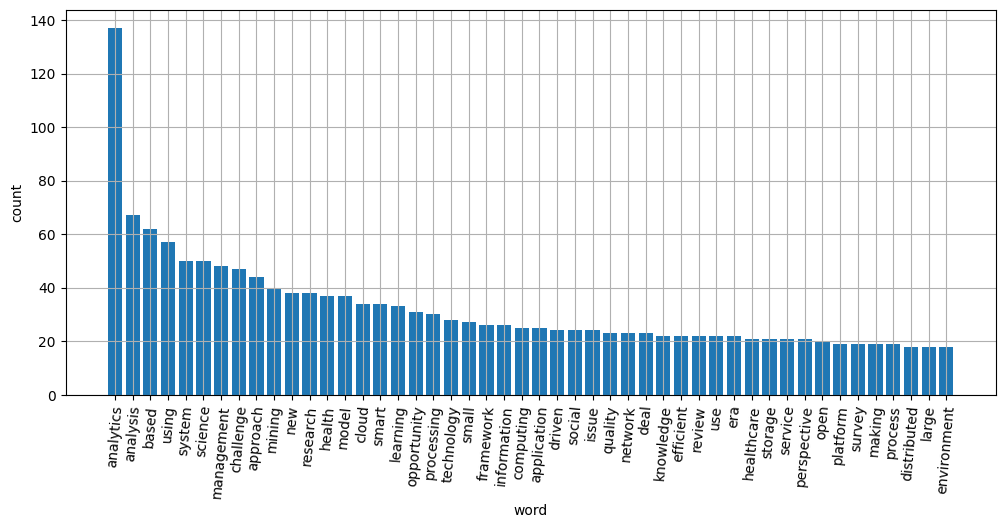

In [24]:
# 히스토그램 표시 옵션 
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
#plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)
plt.show()

In [25]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year  #출력하여 내용 확인

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


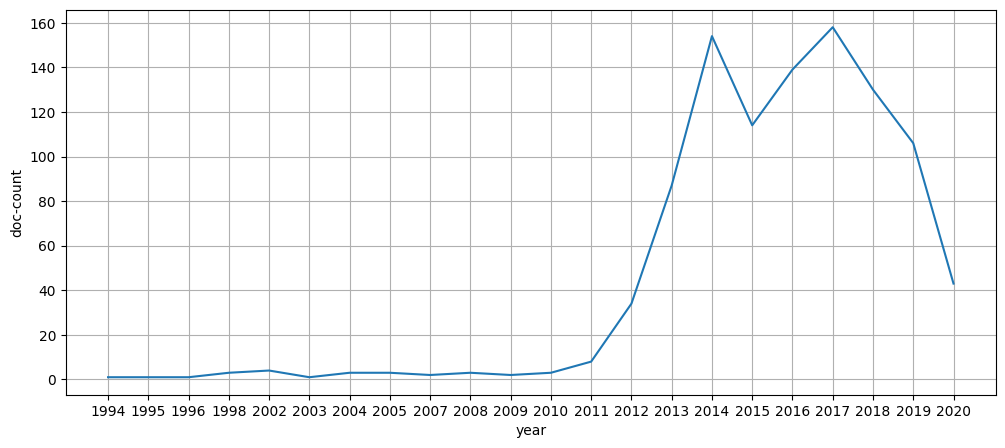

In [26]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])

plt.show()

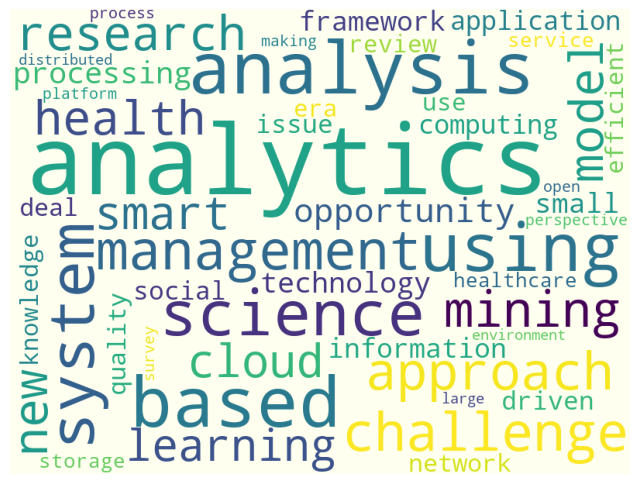

In [27]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
cloud.to_file(r"c:\Temp\riss_bigdata_wordCloud.jpg")